In [1]:
!nvidia-smi

Wed Dec 22 16:56:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    63W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# import the modules 

import tensorflow as tf
import keras

In [3]:
# load the dataset 

from keras.datasets import cifar100

In [4]:
# split the dataset into training and testing 

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [5]:
# checking the size of dataset 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# normalize the images 

'''
RGB (Red, Green, Blue) are 8 bit each.
The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256.

By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

extract : https://stackoverflow.com/questions/20486700/why-do-we-always-divide-rgb-values-by-255
'''

x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# flatten the labels 

y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
# again checking the size of dataset 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

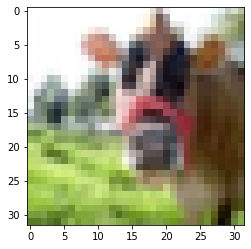

In [9]:
# lets check the images 
# we will use matplotlib to view images 

import matplotlib.pyplot as plt 

# lets check out the first image 

plt.imshow(x_train[0])

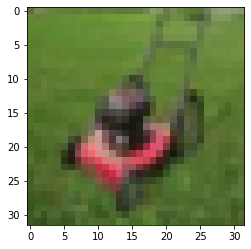

In [10]:
# lets check out 500th images 

plt.imshow(x_train[500])

In [11]:
# lets create images generator to improve the dataset 

batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.2,
    # rotation_range=40,
    height_shift_range=0.2,
    # rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest'
)

train_generator = data_generator.flow(
    x_train,
    y_train,
    batch_size
)

steps = x_train.shape[0] // batch_size

In [14]:
# lets import model and layers from keras api 

# model 
from keras.models import Sequential

# layers 
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout, Flatten

In [15]:
# model architecture creation 

model = Sequential([
                    Input(shape=x_train[0].shape),

                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Conv2D(64, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Conv2D(128, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Flatten(),
                    Dropout(0.2),

                    Dense(1024, activation='relu'),
                    Dropout(0.2),

                    Dense(100, activation='softmax')
])

In [16]:
# compile the model 

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

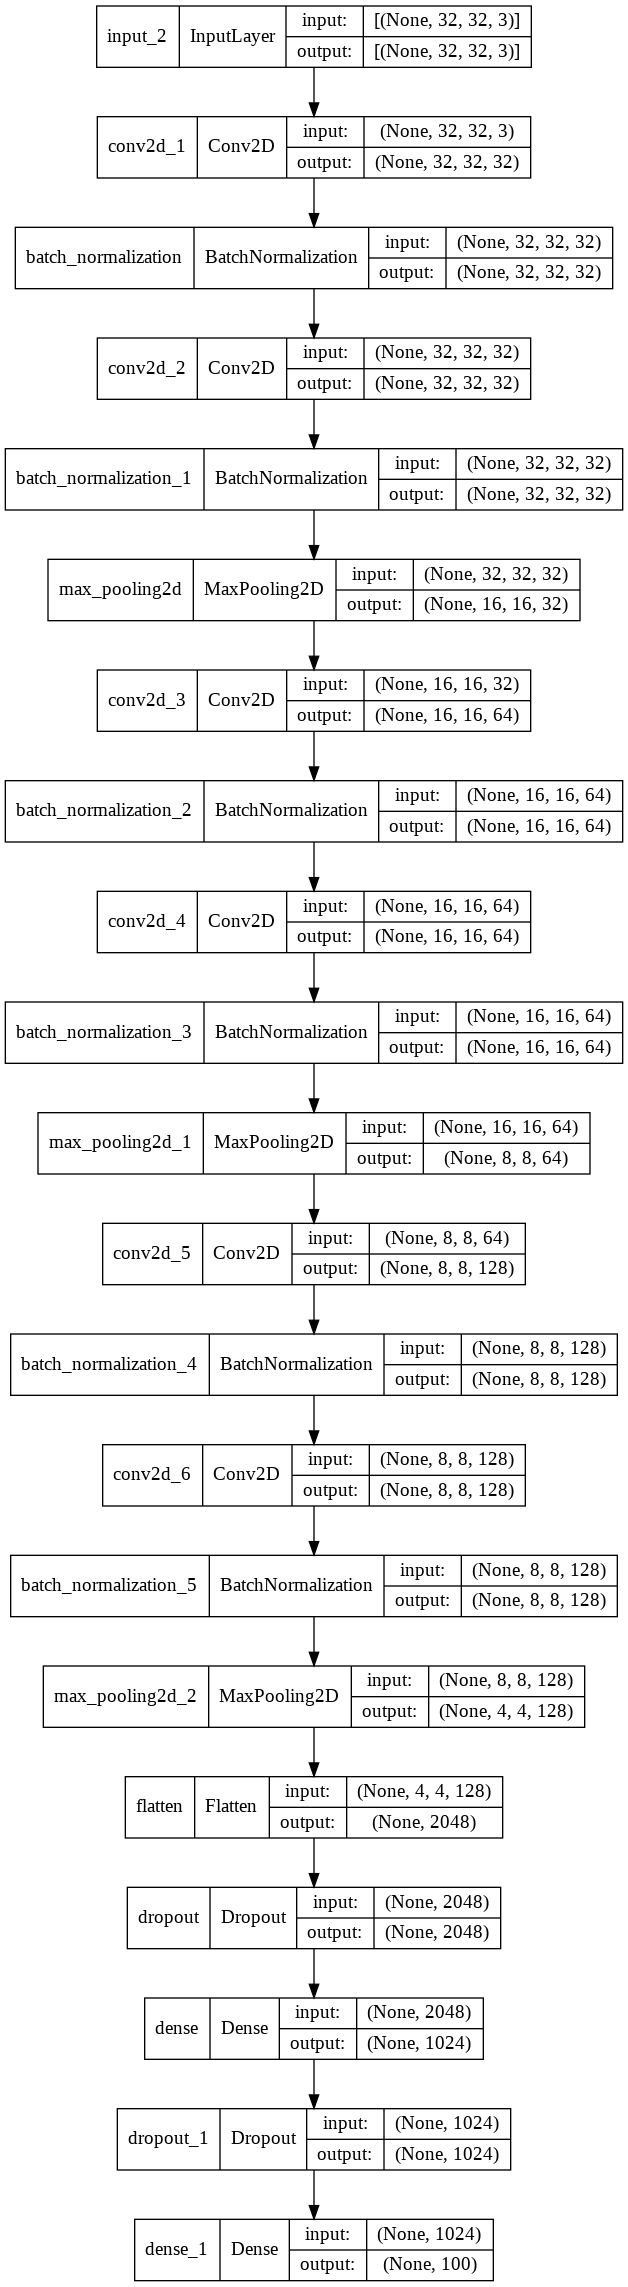

In [17]:
# plotting the model 

tf.keras.utils.plot_model(
    model,
    show_shapes=True
)

In [18]:
# the model summary 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [19]:
# so we are going to first train the model on original dataset 

h1 = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/50
1563/1563 [==============================] - 40s 24ms/step - loss: 3.5669 - accuracy: 0.1701 - val_loss: 3.2469 - val_accuracy: 0.2217
Epoch 2/50
1563/1563 [==============================] - 38s 24ms/step - loss: 2.7096 - accuracy: 0.3132 - val_loss: 2.4565 - val_accuracy: 0.3675
Epoch 3/50
1563/1563 [==============================] - 37s 23ms/step - loss: 2.3084 - accuracy: 0.3940 - val_loss: 2.3333 - val_accuracy: 0.3977
Epoch 4/50
1563/1563 [==============================] - 37s 23ms/step - loss: 2.0203 - accuracy: 0.4556 - val_loss: 2.0047 - val_accuracy: 0.4699
Epoch 5/50
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7795 - accuracy: 0.5083 - val_loss: 2.0260 - val_accuracy: 0.4662
Epoch 6/50
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5698 - accuracy: 0.5600 - val_loss: 1.9057 - val_accuracy: 0.4979
Epoch 7/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3675 - accuracy: 0.6073 - val_loss: 1.8524 -

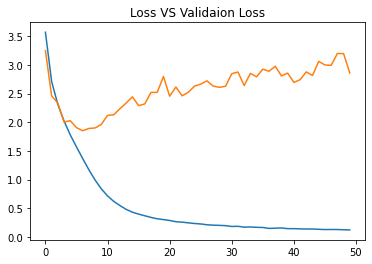

In [20]:
# plotting the chart  

# plotting the loss 
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Loss VS Validaion Loss')
plt.show()

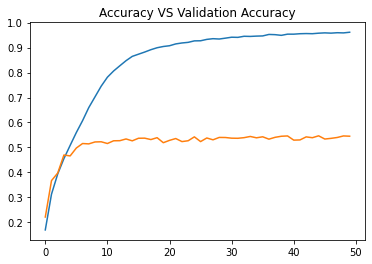

In [21]:
# plotting the accuracy 
plt.plot(h1.history['accuracy']) 
plt.plot(h1.history['val_accuracy'])
plt.title('Accuracy VS Validation Accuracy')
plt.show()

In [22]:
# model evalution 

model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.8574 - accuracy: 0.5451


[2.8573992252349854, 0.5450999736785889]

In [24]:
# again train the model with generated data 

model.fit(
    train_generator, 
    validation_data=(x_test, y_test),
    verbose=1,
    steps_per_epoch=steps,
    epochs=50
)

Epoch 1/50
1562/1562 [==============================] - 54s 34ms/step - loss: 2.3265 - accuracy: 0.4114 - val_loss: 1.8153 - val_accuracy: 0.5272
Epoch 2/50
1562/1562 [==============================] - 52s 33ms/step - loss: 2.0062 - accuracy: 0.4708 - val_loss: 1.7611 - val_accuracy: 0.5302
Epoch 3/50
1562/1562 [==============================] - 51s 32ms/step - loss: 1.8918 - accuracy: 0.4938 - val_loss: 1.6946 - val_accuracy: 0.5428
Epoch 4/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.8093 - accuracy: 0.5099 - val_loss: 1.7230 - val_accuracy: 0.5406
Epoch 5/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.7416 - accuracy: 0.5252 - val_loss: 1.6026 - val_accuracy: 0.5662
Epoch 6/50
1562/1562 [==============================] - 51s 32ms/step - loss: 1.6965 - accuracy: 0.5354 - val_loss: 1.6773 - val_accuracy: 0.5544
Epoch 7/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.6437 - accuracy: 0.5487 - val_loss: 1.6012 -

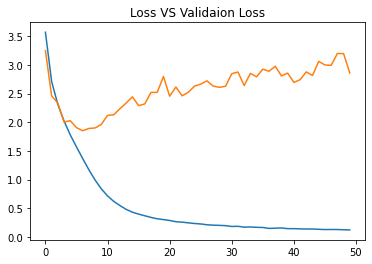

In [25]:
# plotting the chart  

# plotting the loss 
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Loss VS Validaion Loss')
plt.show()

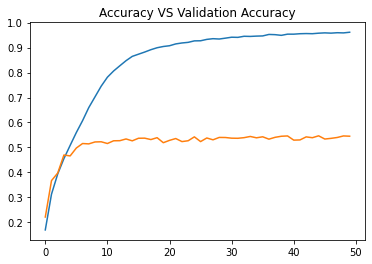

In [26]:
# plotting the accuracy 
plt.plot(h1.history['accuracy']) 
plt.plot(h1.history['val_accuracy'])
plt.title('Accuracy VS Validation Accuracy')
plt.show()

In [27]:
# model evalution 

model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.5412 - accuracy: 0.5934


[1.541187047958374, 0.5934000015258789]

In [28]:
model.save('model.h5')